## Set Up

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import statsmodels.api as sm
import matplotlib.pyplot as plt # plotting
import matplotlib
import altair as alt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import HTML
alt.renderers.enable('notebook')
from sklearn import metrics
matplotlib.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

gdp_data = pd.read_csv('./GDP.csv')
gdp_data= gdp_data.fillna(method = "bfill")
gdp_capita_data = pd.read_csv('./GDP_capita.csv')
gdp_capita_data = gdp_capita_data.fillna(method = "bfill")
rsf_freedom_data = pd.read_csv('./rsf_data.csv')
rsf_freedom_data = rsf_freedom_data.fillna(method = "bfill")


gdp_capita_codes = gdp_capita_data["Country Code"].tolist()
gdp_codes = gdp_data["Country Code"].tolist()
final_gdp_data = pd.DataFrame()

for c in gdp_capita_codes:
    if c in gdp_codes:
        temp = gdp_data[gdp_data["Country Code"] == c]
        frames = [final_gdp_data, temp]
        final_gdp_data = pd.concat(frames)
final_gdp_data = final_gdp_data.merge(gdp_capita_data, on = 'Country Code')

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Degrees of Freedom: GDP per Capita vs. Press Freedom

## Introduction
Economically prosperous countries are generally perceived to have a higher standard of living, lower poverty rates, and general happiness and freedom of citizens, than a country that is not as economically prosperous. Studies have shown that economic status plays a role in how free citizens are, which raises the question of whether the prosperity of a country’s citizens is heavily based in it’s monetary prosperity and shifts the weight towards the role that other variables like the country’s political regime, literacy rates, and more can play.

One type of freedom that plays a pivotal role in democracy in particular is freedom of the press. Freedom of Press is the mere principal in communicating information and expression through electronic or printed mediums freely. It is vital in informing citizens of a country about public affairs and holding actions of powerful governments accountable at all levels. Not only does this freedom allow citizens to gain insight on government actions, but it empowers the people to express themselves, their opinions, and gain exposure to a wide variety of information. 

In the new millenium, we have leveraged new technology and social media dominance to make information sharing easier to protect our basic fundamental rights. In this resource, we acknowledge that there is a digital divide in the world and that many countries don’t have enough resources to access to these technologies or social media. Thus our scope here is how press freedom through all channesl plays out on the global stage. Threats like "fake news" and propaganda spewed through media outlets like we see in the United States poses a threat to our nation’s First Amendment of the Constitution. This sparked our curiosity in exploring the relationship between a country’s GDP status and their Press Freedom Index (provided by the Reporters Without Borders [RSF] non-profit organization). 

In this analysis, we would like to find explore if a correlation exists between a country's GDP per capita and Press Freedom Index.


## The Data: Reporters Sans Frontières & The World Bank

### _World Press Freedom Index_
We used several datasets in this analysis from two different organizations to analyze the relationship between freedom of press with the GDP of a country.

We used the “World Press Freedom Index” from Reporters without Borders (Reporters Sans Frontières). RSF in an international non-profit organization headquartered in Paris, France that has consultant status for the United Nations. Their dataset reports scores regarding press freedoms in of 188 countries, and has archives back to 2002. These scores are an Abuse Score, an Underlying Situation Score, and a difference in scores and position from the previous year.

The criteria evaluated in the questionnaire are abuse, pluralism, media independence, media environment and self-censorship, legislative framework, transparency, and the quality of the infrastructure that supports the production of news and information.This data is compiled from a robust questionnaire sent to media professionals, lawyers, and sociologists in 20 languages. The Underlying Situation score encompasses data from the 7 criteria formerly described. The Abuse Score indicates the mistreatment of reporters in form of violence, persecution, and other such slander towards reporters. 
    
### _GDP and GDP Per Capita_
We also used datasets of Gross Domestic Product and Gross Domestic Product Per Capita (GDP divided by the country's population) from The World Bank. The World Bank Group is a financial institution that facilitates loaning money to developing countries for capital projects and is headquartered in Washington D.C. 

### _Variables Defined_


- **Abuse Score**:  Indicates the levels of mistreatment of media centers/reporters in form of violence, persecution, and other such slander towards media, reporters, and organizations. The higher the score, the greater the abuse towards media. Often abuse come from the governing regime towards unfavored/anti-establishment reporting.


- **Underlying Situation Score**: Indicates the country's institutional conduciveness towards free media. The lower the score, the greater conducivity towards free press. Computed from measures pluralism, media independence, media environment and self-censorship, legislative framework, transparency, and the quality of the infrastructure that supports the production of news and information.


- **Freedom Index Rank**: The country's ranking in the RSF Press Freedom Index. Countries with lower Overall Freedom Scores score higher on the Index.


- **Overall Freedom Score**: the all-encompassing metric of press freedom used to rank countries in the RSF Press Freedom Index. The lower the number, the freer the press. The Overall Freedom Score is computed from the incorporation of abuse metrics into the underlying situation score. The abuse score is added to this metric because it is possible that a country has a low situation score (by appearance of conduciveness to free press by other accounts) but has high restrictions on information due to whistle-blowing reporters and organizations being threatened to silence. This metric therefore gives a fuller picture of a country's true freedom of press.


- **GDP**: The Gross Domestic Product for a specified year.


- **GDP Per Capita**: The Gross Domestic Product / Population of country.

This data is available for **176 countries** , however there may be innacurate or inconsistent data due to issues in collection methods.

In [14]:
rsf_codes = rsf_freedom_data["Country Code"].tolist()
final = pd.DataFrame()

for c in gdp_capita_codes:
    if c in rsf_codes:
        temp = rsf_freedom_data[rsf_freedom_data["Country Code"] == c]
        frames = [final, temp]
        final = pd.concat(frames)
final = final.drop(['FR_Country', 'EN_country', 'ES_country', 'Zone'], axis=1)
real_final = final_gdp_data.merge(final, on = 'Country Code')



### Freedom Score vs Freedom Index Rank

We first chose to explore the relationship between the Overall Freedom Score and the Freedom Rank of the country's in 2016 (this was the most recent data that was provided). This graph shows us that the lower a nation's overall freedom score is, the higher they are ranked, indicating that there is greater freedom of press. As shown in the graph, Norway is 1st in ranking, and has an Overall Freedom Score of 7.63/100. This indicates the greatest freedom of press. North Korea is the lowest rank with an Overall Freedom Score of 88.87/100.

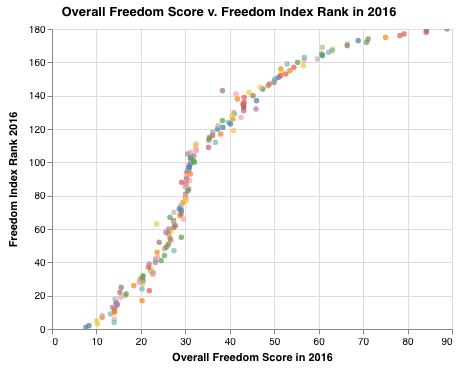

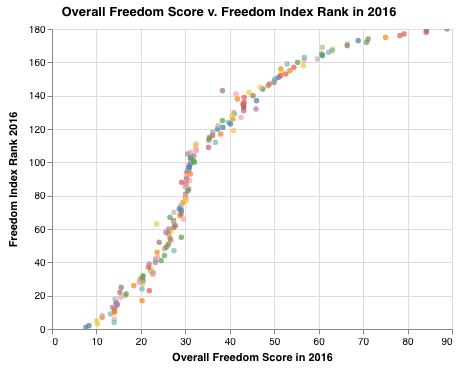

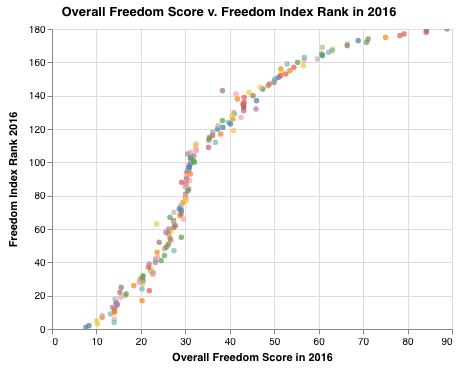

In [17]:
alt.Chart(real_final).mark_circle().encode(
    alt.X('Overall Score 2016:Q', axis=alt.Axis(title='Overall Freedom Score in 2016')),
    alt.Y('Rank 2017:Q', scale=alt.Scale(zero=False), axis=alt.Axis(title='Freedom Index Rank 2016')),
    tooltip=['Country Name_x', 'Rank 2017', 'Overall Score 2016', '2016_y', 'Abuse score 2016'],
    color=alt.Color('Country Name_x', legend=None),
).properties(
    title='Overall Freedom Score v. Freedom Index Rank in 2016'
).interactive()



### Gross Domestic Product vs Overall Freedom Score in 2016

To begin answering our question regarding the correlation between the GDP and Press Freedom, we made a scatterplot of the various countries and their Overall Freedom Scores vs. GDP's in 2016. It is very difficult to observe a correlation from this graph, and the data needs to be normalized.

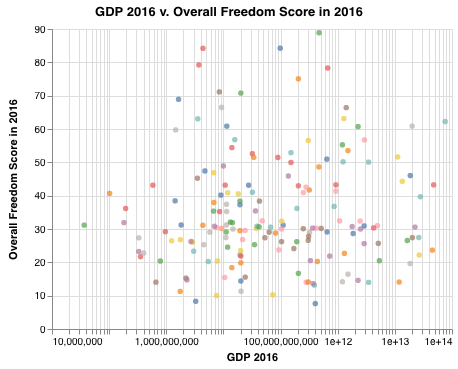

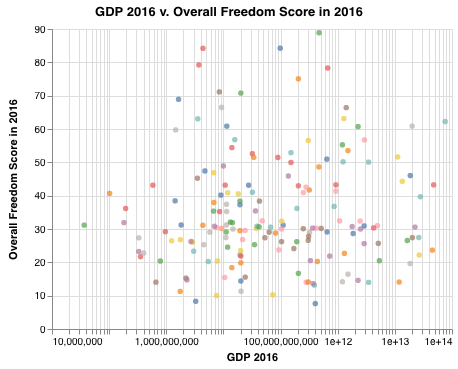

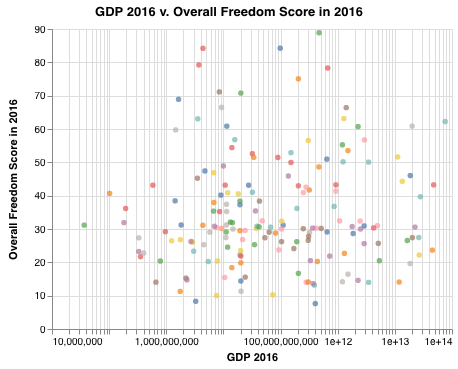

In [6]:
alt.Chart(real_final).mark_circle().encode(
    alt.X('2016_x:Q', scale=alt.Scale(type='log'), axis=alt.Axis(title='GDP 2016')),
    alt.Y('Overall Score 2016:Q', scale=alt.Scale(zero=False), axis=alt.Axis(title='Overall Freedom Score in 2016')),
    color=alt.Color('Country Name_x', legend=None),
    tooltip=['Country Name_x', 'Rank 2017', 'Overall Score 2016', '2016_x', 'Abuse score 2016']
).properties(
    title='GDP 2016 v. Overall Freedom Score in 2016'
).interactive()

### GDP Per Capita vs Overall Freedom Score in 2016

Upon exploring the general relationship between GDP and Overall Freedom scores, we recoginzed that results may be skewed due to population's complex relationship with GDP. To normalize the data and learn about a possible relationship between GDP and quality of life and freedoms, we decided to compare GDP Per Capita and the Overall Freedom Score. From this normalizaton, we were able to see a negative relationship more clearly. As the GDP Per Capita of a country increases, the lower (better) their Overall Freedom Score is. 

#### Abuse Score
We also chose to include the Abuse Score as a metric of interest (via bubble size) to learn more about the relationship between GDP, quality of life and freedoms, and abuse of press. As expected, countries with worse rankings often had higher abuse scores, but there was still variance in the abuse scores even withing the top 30 ranked countries. This indicates that GDP is not the strongest indicator of press abuse.

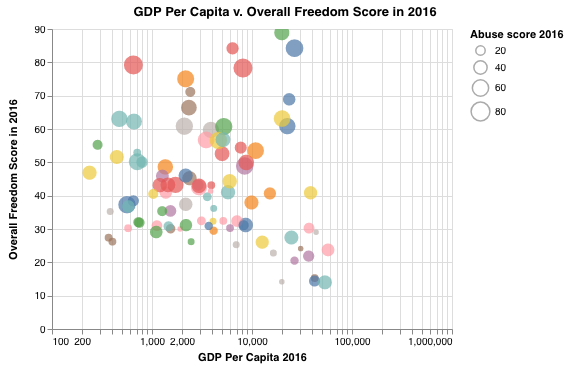

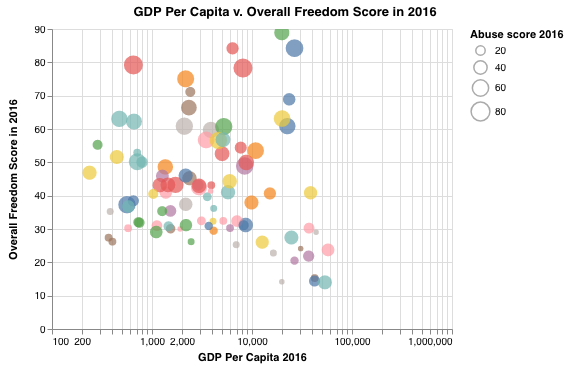

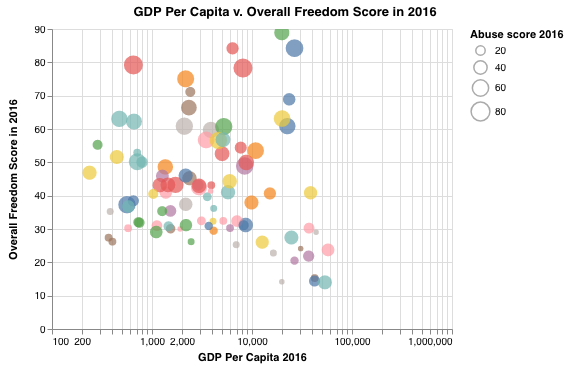

In [7]:
alt.Chart(real_final).mark_circle().encode(
    alt.X('2016_y:Q', scale=alt.Scale(type='log'), axis=alt.Axis(title='GDP Per Capita 2016')),
    alt.Y('Overall Score 2016:Q', scale=alt.Scale(zero=False), axis=alt.Axis(title='Overall Freedom Score in 2016')),
    size='Abuse score 2016:Q',
    color=alt.Color('Country Name_x', legend=None),
    tooltip=['Country Name_x', 'Rank 2017', 'Overall Score 2016', '2016_y', 'Abuse score 2016']
).properties(
    title='GDP Per Capita v. Overall Freedom Score in 2016'
).interactive()

### Overall Freedom Score vs Underlying Situation Score in 2016

In the RSF data, there are several scores to indicate a country's conduciveness to free press. In order to explore the impact that abuse of press has on a country's freedom score we plotted the Overall Freedom Rank vs. The Underlying Situation Score (which incorporates all of the information from the Overall Situation Score except abuse). As seen in the graph, we saw a very strong correlation between the two variables, indicating that the Freedom Rank for a country would be low as the Underlying Situation Score (a country's conduciveness towards free media) increases. The lower the Freedom Score, the more "free" the country is. But there were several countries in which the Freedom Score and the Underlying situation score were not the same, which indicates practices of abuse towards the press.

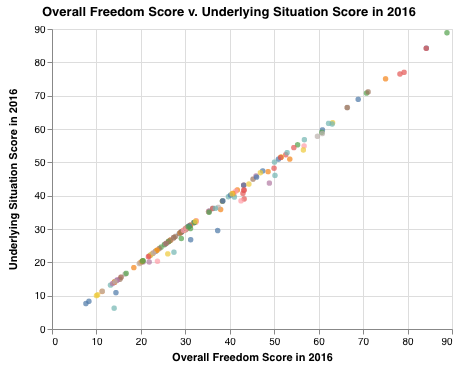

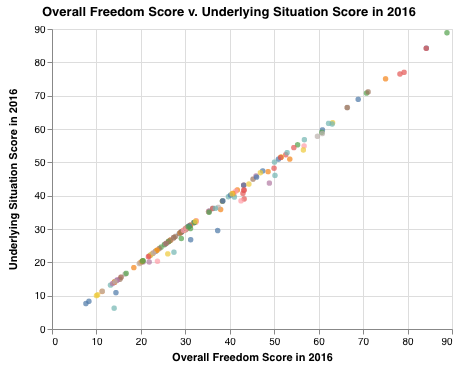

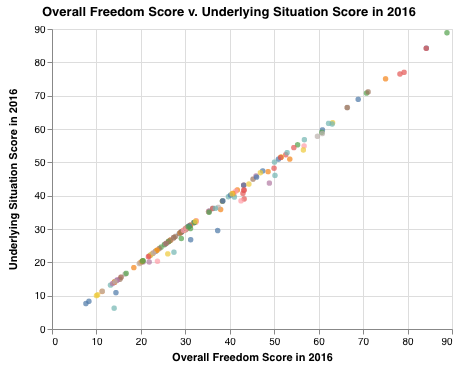

In [39]:
alt.Chart(real_final).mark_circle().encode(
    alt.X('Overall Score 2016:Q', axis=alt.Axis(title='Overall Freedom Score in 2016')),
    alt.Y('Underlying situation score 2016:Q', scale=alt.Scale(zero=False), axis=alt.Axis(title='Underlying Situation Score in 2016')),
    tooltip=['Country Name_x'],
    color=alt.Color('Country Name_x', legend=None),
).properties(
    title='Overall Freedom Score v. Underlying Situation Score in 2016'
).interactive()



### Comparing Overall Freedom & Underlying Situation Scores in Outlier Countries

Since several countries in the graph above did not have equal Underlying Situation Scores and Overall Freedom Scores. we were interested in observing how much the scores differed for the outlier countries. These countries are:

- Denmark
- Germany
- France
- United States
- Argentina
- Malta
- Mauritania
- Brazil
- Afghanistan
- Nigeria
- Phillipines
- India
- Mexico
- Ethiopia
- Russia
- Iraq
- West Bank and Gaza
- Pakistan
- Bangladesh
- Turkey
- Egypt, Arab Rep.
- Syrian Arab Republic

As shown in this graph, the underlying situation is certainly a large part of the freedom of the press in the country, but the treatment of the media (often anti-establishment media) also heavily affects the freedom of the press. The Underlying Situation Scores do not take the Abuse Scores into account, and we wanted to explore the hidden weight of Abuse Scores by comparing the Underlying Situation and Overall Freedom Scores. 

From this, we were interested in seeing how much of the Underlying Situation Scores played a part in the Overall Freedom Score to better determine how Abuse Scores may play a role in how "free" a nation's press actually is. The Abuse Scores reflect the actions of the government (and other entities) against media personnel.

The effects of the Abuse Score on the Overall Score is important to note because the Underlying situation score focuses primarily on infrastructural and institutional conduciveness to free press. It is possible that a country has a low Underlying Situation Score (by appearance of conduciveness to free press by other accounts) but has high restrictions on information due to whistle-blowing reporters and organizations being threatened to silence (indicated by the Abuse Score). The Overall Score then can be "corrected" to encompass the full set of variables and give a more accurate ranking.

_*Note some data may not be accurately captured in the dataset. These missing values for Abuse Scores could be due to hushing, lack of information and networking, imprisonment, or normative behaviors for government retaliation. For example, Equitorial Guinea scored a zero on the Abuse Score when it is very low ranked, indicating that it is not country conducive to free press. This may be resultant of lack of data from RSF surveys rather than no incidents._


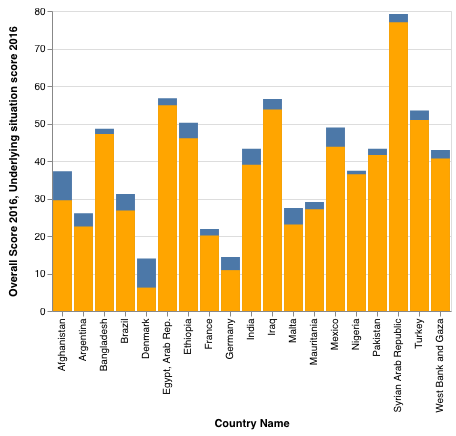

In [15]:
outliers = ["Denmark", "Germany", "France", "US", "Argentina", "Malta", "Mauritania", "Brazil", "Afghanistan",
"Nigeria", "Phillipines", "India", "Mexico", "Ethiopia", "Russia", "Iraq", "West Bank and Gaza", 'Pakistan', 'Bangladesh', 
           'Turkey', 'Egypt, Arab Rep.', 'Syrian Arab Republic']

outlier_pd = pd.DataFrame()
for country in outliers:
    temp = real_final[real_final["Country Name_x"] == country]
    frames = [outlier_pd, temp]
    outlier_pd = pd.concat(frames)

situation_chart = alt.Chart(outlier_pd).mark_bar().encode(
    alt.X('Country Name_x', axis=alt.Axis(title='Country Name')),
    alt.Y('Underlying situation score 2016'),
    color=alt.value("orange"),
    tooltip=['Country Name_x', 'Underlying situation score 2016'],
)

overall_chart = alt.Chart(outlier_pd).mark_bar().encode(
    alt.X('Country Name_x'),
    alt.Y('Overall Score 2016'),
    tooltip=['Country Name_x', 'Overall Score 2016'],
)

overall_chart + situation_chart 

In [33]:
#Linear Regression Model to assess correlation between GDP per Capita in 2016 and Overall Score in 2016
md = sm.WLS(real_final['2016_y'], real_final['Overall Score 2016'])
mdf = md.fit()
mdf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 2016_y   R-squared:                       0.165
Model:                            WLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     34.66
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.96e-08
Time:                        16:30:24   Log-Likelihood:                -1993.7
No. Observations:                 176   AIC:                             3989.
Df Residuals:                     175   BIC:                             3993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Overall Score 2016   231.5829     39.338      5.887      0.000     153.945     309.221
==============================================================================
Omnibus:                       79.474   Durbin-Watson:                   1.730
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.488
Skew:                           1.952   Prob(JB):                     2.95e-49
Kurtosis:                       6.903   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

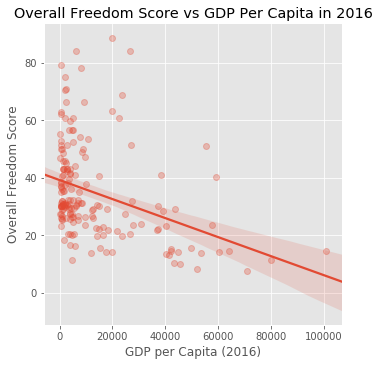

In [47]:
model = sns.lmplot(x="2016_y", y="Overall Score 2016", data=real_final, scatter_kws={'alpha':0.3})
model.set(xlabel='GDP per Capita (2016)', ylabel='Overall Freedom Score')
model.set(title ='Overall Freedom Score vs GDP Per Capita in 2016')


In [35]:
#Contrast how Freedom Index has changed in countries with low and high GDP? (Pick 1-2 countries on each side) Does having a high/low GDP affect Freedom Index? (Difference in Differences)
bulgaria = real_final[real_final['Country Code'] == 'BGR']
france = real_final[real_final['Country Code'] == 'FRA']
burundi = real_final[real_final['Country Code'] == 'BDI']
bahrain = real_final[real_final['Country Code'] == 'BHR']
differences = pd.DataFrame()
frames = [differences, bulgaria, france]
differences = pd.concat(frames)
md = sm.OLS(differences['2016_y'], differences['Overall Score 2016'])
mdf = md.fit()
mdf.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 2016_y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.8875
Date:                Tue, 04 Dec 2018   Prob (F-statistic):              0.519
Time:                        16:30:36   Log-Likelihood:                -22.580
No. Observations:                   2   AIC:                             47.16
Df Residuals:                       1   BIC:                             45.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Overall Score 2016   622.2130    660.489      0.942      0.519   -7770.095    9014.521
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.896
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.333
Skew:                           0.000   Prob(JB):                        0.846
Kurtosis:                       1.000   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
burundi = real_final[real_final['Country Code'] == 'BDI']
bahrain = real_final[real_final['Country Code'] == 'BHR']
differences = pd.DataFrame()
frames = [differences, burundi, bahrain]
differences = pd.concat(frames)
md = sm.OLS(differences['2016_y'], differences['Overall Score 2016'])
mdf = md.fit()
mdf.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 2016_y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     1.276
Date:                Tue, 04 Dec 2018   Prob (F-statistic):              0.461
Time:                        16:30:40   Log-Likelihood:                -21.370
No. Observations:                   2   AIC:                             44.74
Df Residuals:                       1   BIC:                             43.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Overall Score 2016   205.5241    181.948      1.130      0.461   -2106.344    2517.392
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.995
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.333
Skew:                           0.000   Prob(JB):                        0.846
Kurtosis:                       1.000   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
real_final.to_csv('./final.csv')